# 회귀(Regression)

예측할 값(Target)이 연속형(continuous) 데이터(float)인 지도 학습(Supervised Learning).

## 회귀의 주요 평가 지표

- ### MSE (Mean Squared Error)
    - 실제 값과 예측값의 차를 제곱해 평균 낸 것
    - scikit-learn 평가함수: mean_squared_error() 
    - 교차검증시 지정할 문자열: 'neg_mean_squared_error'
    $$
    MSE = \frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y_i})^2\\
    y_i: 실제값, \hat{y_i}: 모델이 예측한 값
    $$
    

- ### RMSE (Root Mean Squared Error)
    - MSE는 오차의 제곱한 값이므로 실제 오차의 평균보다 큰 값이 나온다.  MSE의 제곱근이 RMSE이다.
    - mean_squared_error() 의 squared=False로 설정해서 계산. 또는 MSE를 구한 뒤 np.sqrt()로 제곱근을 구한다.
    - 교차검증시 지정할 문자열: 'neg_root_mean_squared_error'
    
    $$
    RMSE = \sqrt{\frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y_i})^2}
    $$

- ### $R^2$ (R square, 결정계수)
    - 평균으로 예측했을 때 오차(총오차) 보다 모델을 사용했을 때 얼마 만큼 더 좋은 성능을 내는지를 비율로 나타낸 값. 
    - 1에 가까울 수록 좋은 모델.
    - scikit-learn 평가함수: r2_score()
    - 교차검증시 지정할 문자열: 'r2'
    - [참고](https://ko.khanacademy.org/math/statistics-probability/describing-relationships-quantitative-data/assessing-the-fit-in-least-squares-regression/a/r-squared-intuition)
    $$
    R^2 = \cfrac{\sum_{i=1}^{n}(\hat{y_i}-\bar{y})^2}{\sum_{i=1}^{n}(y_i - \bar{y})^2}\\
    R^2 = 1 - \cfrac{\sum_{i=1}^{n}(y_i - \hat{y_i})^2}{\sum_{i=1}^{n}(y_i - \bar{y})^2}
    $$

- $y_i$ : i번째 정답값, 
- $\hat{y_i}$ : i 번째 예측 값, 
- $\bar{y}$ : y의 평균    

### 예제

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression

##### Dataset 생성
- make_xxxxx() 함수
    - 머신러닝 학습을 위한 dummy dataset 구현 함수
    - 필요한 설정을 직접하여 테스트할 수 있는 데이터셋을 생성해준다.
- make_regression(): 회귀 문제를 위한 dummy dataset 생성
- make_classification(): 분류 문제를 위한 dummy dataset 생성

In [2]:
# make_regression(): 설정한 조건에 맞는 회귀 문제를 위한 데이터셋을 생성.반환: Feature(X), Target(y)
X, y = make_regression(n_samples=1000,  #데이터 포인트(sample)의 개수 (Table 데이터: 행수)
                       n_features=1,    #feature 의 개수(table 데이터: 열수)
                       n_informative=1, #Target(정답)에 영향을 주는 Feature 개수
                       noise=50, # 잡음. 모델이 찾을수 없는 값의 범위 지정. (패턴에서 벗어난 값의 크기)
                       random_state=0)

In [3]:
X.shape, y.shape

((1000, 1), (1000,))

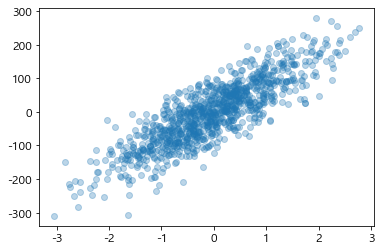

In [4]:
plt.scatter(X, y, alpha=0.3)

##### 모델 생성, 학습, 추론

In [5]:
lr = LinearRegression()
lr.fit(X, y)
pred = lr.predict(X)

##### 평가

In [8]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y, pred)  #(정답, 예측)
rmse = mean_squared_error(y, pred, squared=False) # RMSE
r2 = r2_score(y, pred)
print("MSE : ", mse)
print("RMSE : ", np.sqrt(mse), rmse)
print('R^2 : ', r2, lr.score(X, y))

# 회귀모델.score(X, y) # r2_score를 계산해서 반환.

MSE :  2461.0377337239934
RMSE :  49.60884733315211 49.60884733315211
R^2 :  0.7264007364619969 0.7264007364619969


##### 교차검증 (cross validation)

In [9]:
score = cross_val_score(lr, X, y, cv=5)   #scoring='r2' 기본값
print("cv별 R2:", score)
print("평균 R2: ", np.mean(score))

cv별 R2: [0.75601278 0.698025   0.72635497 0.72045804 0.72727316]
평균 R2:  0.7256247907760487


In [10]:
score = cross_val_score(lr, X, y, scoring='neg_mean_squared_error', cv=5)
print(score)
print("mse:", score*-1)
print("mse평균: ", np.mean(score)*-1)

[-2010.85262268 -2838.55092577 -2644.84308496 -2556.21216438
 -2309.34464992]
mse: [2010.85262268 2838.55092577 2644.84308496 2556.21216438 2309.34464992]
mse평균:  2471.9606895426596


##### 모델이 찾은 계수(coef, 가중치-weigth)와 절편(intercept, 편향-bias) 조회
- LinearRegression 모델이 학습해서 찾는 파라미터 제공 attribute
    - coef_: Feature에 곱하는 가중치
    - intercept_: 모든 Feature가 0일때 예측값

In [11]:
lr.fit(X, y)
print("coef:", lr.coef_, "intercept:",lr.intercept_)

coef: [81.89512864] intercept: 1.2938791888157457


##### X, y와 추론결과  시각화

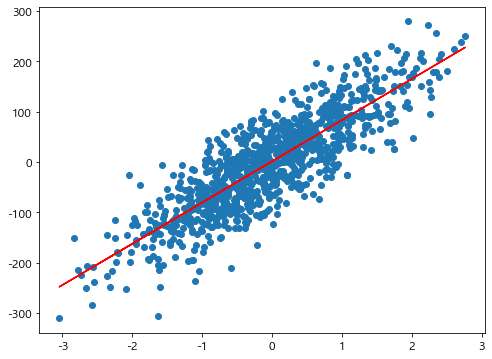

In [12]:
plt.figure(figsize=(8,6))
plt.scatter(X, y)
# y_hat = X*lr.coef_ + lr.intercept_
y_hat = lr.predict(X)
plt.plot(X, y_hat, color='red')
plt.show()